In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv2D, Input, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2 


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0

x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the Gabor layer
class GaborLayer(Layer):
    def __init__(self, filters, kernel_size, sigma=1.0, theta=0.0, **kwargs):
        super(GaborLayer, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.sigma = sigma
        self.theta = theta

    def build(self, input_shape):
        self.gabor_filter = self.add_weight("gabor_filter",
                                            shape=(self.kernel_size[0], self.kernel_size[1], input_shape[-1], self.filters),
                                            initializer='random_normal',
                                            trainable=False)
        super(GaborLayer, self).build(input_shape)

    def call(self, x):
        '''Apply the Gabor filters'''
        result = tf.nn.conv2d(x, self.gabor_filter, strides=[1, 1, 1, 1], padding='SAME')
        return result

# Build a Gabor Convolutional Neural Network
input_shape = (28, 28, 1)  # MNIST image shape
num_classes = 10

model = tf.keras.Sequential([
    Input(shape=input_shape),
    GaborLayer(filters=32, kernel_size=(3, 3)),
    tf.keras.layers.Activation('relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')






Epoch 1/5


1875/1875 [==============================] - 54s 28ms/step - loss: 0.1323 - accuracy: 0.9592 - val_loss: 0.0571 - val_accuracy: 0.9816
Epoch 2/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0429 - accuracy: 0.9865 - val_loss: 0.0456 - val_accuracy: 0.9849
Epoch 3/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0277 - accuracy: 0.9914 - val_loss: 0.0380 - val_accuracy: 0.9873
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.0397 - val_accuracy: 0.9879
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0424 - accuracy: 0.9877
Test accuracy: 0.9876999855041504


In [2]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Get the index with the maximum probability as the predicted class
predicted_classes = np.argmax(predictions, axis=1)

# Display a few sample predictions
for i in range(5):
    print(f"Sample {i + 1}: Predicted class: {predicted_classes[i]}, True class: {np.argmax(y_test[i])}")


313/313 [==============================] - 2s 5ms/step
Sample 1: Predicted class: 7, True class: 7
Sample 2: Predicted class: 2, True class: 2
Sample 3: Predicted class: 1, True class: 1
Sample 4: Predicted class: 0, True class: 0
Sample 5: Predicted class: 4, True class: 4


313/313 [==============================] - 2s 6ms/step


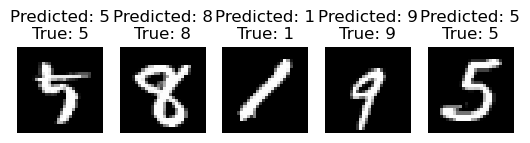

In [12]:
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(x_test)

# Display a few sample predictions with images
num_samples_to_display = 5

for j in range(5):
    # Get the predicted and true class labels
    i = np.random.randint(len(predictions))
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test[i])

    # Display the image
    plt.subplot(1, num_samples_to_display, j + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_class}\nTrue: {true_class}")
    plt.axis('off')

plt.show()

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv2D, Input, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2 

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0

x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the Gabor layer
class GaborLayer(Layer):
    def __init__(self, filters, kernel_size, sigma=1.0, theta=0.0, **kwargs):
        super(GaborLayer, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.sigma = sigma
        self.theta = theta

    def build(self, input_shape):
        self.gabor_filter = self.add_weight("gabor_filter",
                                            shape=(self.kernel_size[0], self.kernel_size[1], input_shape[-1], self.filters),
                                            initializer='random_normal',
                                            trainable=False)
        super(GaborLayer, self).build(input_shape)

    def call(self, x):
        '''Apply the Gabor filters'''
        result = tf.nn.conv2d(x, self.gabor_filter, strides=[1, 1, 1, 1], padding='SAME')
        return result

# Build a Gabor Convolutional Neural Network
input_shape = (28, 28, 1)  # MNIST image shape
num_classes = 10

cnn_model = tf.keras.Sequential([
    Input(shape=input_shape),
    tf.keras.layers.Activation('relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=num_classes, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1380 - accuracy: 0.9585 - val_loss: 0.0592 - val_accuracy: 0.9800
Epoch 2/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0469 - accuracy: 0.9861 - val_loss: 0.0480 - val_accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0414 - val_accuracy: 0.9855
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.0410 - val_accuracy: 0.9865
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0424 - accuracy: 0.9877
Test accuracy: 0.9876999855041504


In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv2D, Input, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2 

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0

x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the Gabor layer
class GaborLayer(Layer):
    def __init__(self, filters, kernel_size, sigma=1.0, theta=0.0, **kwargs):
        super(GaborLayer, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.sigma = sigma
        self.theta = theta

    def build(self, input_shape):
        self.gabor_filter = self.add_weight("gabor_filter",
                                            shape=(self.kernel_size[0], self.kernel_size[1], input_shape[-1], self.filters),
                                            initializer='random_normal',
                                            trainable=False)
        super(GaborLayer, self).build(input_shape)

    def call(self, x):
        '''Apply the Gabor filters'''
        result = tf.nn.conv2d(x, self.gabor_filter, strides=[1, 1, 1, 1], padding='SAME')
        return result

# Build a Gabor Convolutional Neural Network
input_shape = (28, 28, 1)  # MNIST image shape
num_classes = 10

gabor_model = tf.keras.Sequential([
    Input(shape=input_shape),
    GaborLayer(filters=32, kernel_size=(5,5)),
    tf.keras.layers.Activation('relu'),
    #Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=num_classes, activation='softmax')
])

# Compile the model
gabor_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
gabor_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2076 - accuracy: 0.9399 - val_loss: 0.1153 - val_accuracy: 0.9649
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0847 - accuracy: 0.9745 - val_loss: 0.0858 - val_accuracy: 0.9734
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0589 - accuracy: 0.9821 - val_loss: 0.0598 - val_accuracy: 0.9806
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0493 - accuracy: 0.9850 - val_loss: 0.0563 - val_accuracy: 0.9815
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0424 - accuracy: 0.9877
Test accuracy: 0.9876999855041504


In [ ]:
custom_img = np.squeeze(custom_img)
custom_img.shape

313/313 [==============================] - 1s 2ms/step


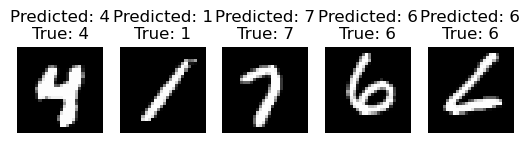

In [19]:
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = gabor_model.predict(x_test)

# Display a few sample predictions with images
num_samples_to_display = 5

for j in range(5):
    # Get the predicted and true class labels
    i = np.random.randint(len(predictions))
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test[i])

    # Display the image
    plt.subplot(1, num_samples_to_display, j + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_class}\nTrue: {true_class}")
    plt.axis('off') 
plt.show()

In [20]:
img = plt.imread(r"C:\Users\91898\Documents\Screenshot 2024-03-11 160042.png")

In [26]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [38]:
img = (np.resize(img,(128,128)))

In [ ]:
pred = gabor_model.predict(img)